In [1]:
import pandas as pd
from scipy.io import arff
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

## Data Preprocessing

In [3]:
## Load data
data, meta = arff.loadarff('chronic_kidney_disease.arff') # Load data
df = pd.DataFrame(data) # Convert to pandas DataFrame
df.replace(b'?', pd.NA, inplace=True) # Replace missing values '?' with NaN
df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x) # Decode bytes to string

## Preprocess data
le = LabelEncoder()
for column in df.select_dtypes(include=['object']).columns:
    df[column] = le.fit_transform(df[column].astype(str))

# Filling the remaining missing values with the mean for each column
df.fillna(df.mean(), inplace=True)

X = df.drop('class', axis=1)
y = df['class']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\AUC\AppData\Local\Temp\ipykernel_19280\1738978835.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x) # Decode bytes to string


## Data visualization

c:\Users\AUC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AUC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AUC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\AUC\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead

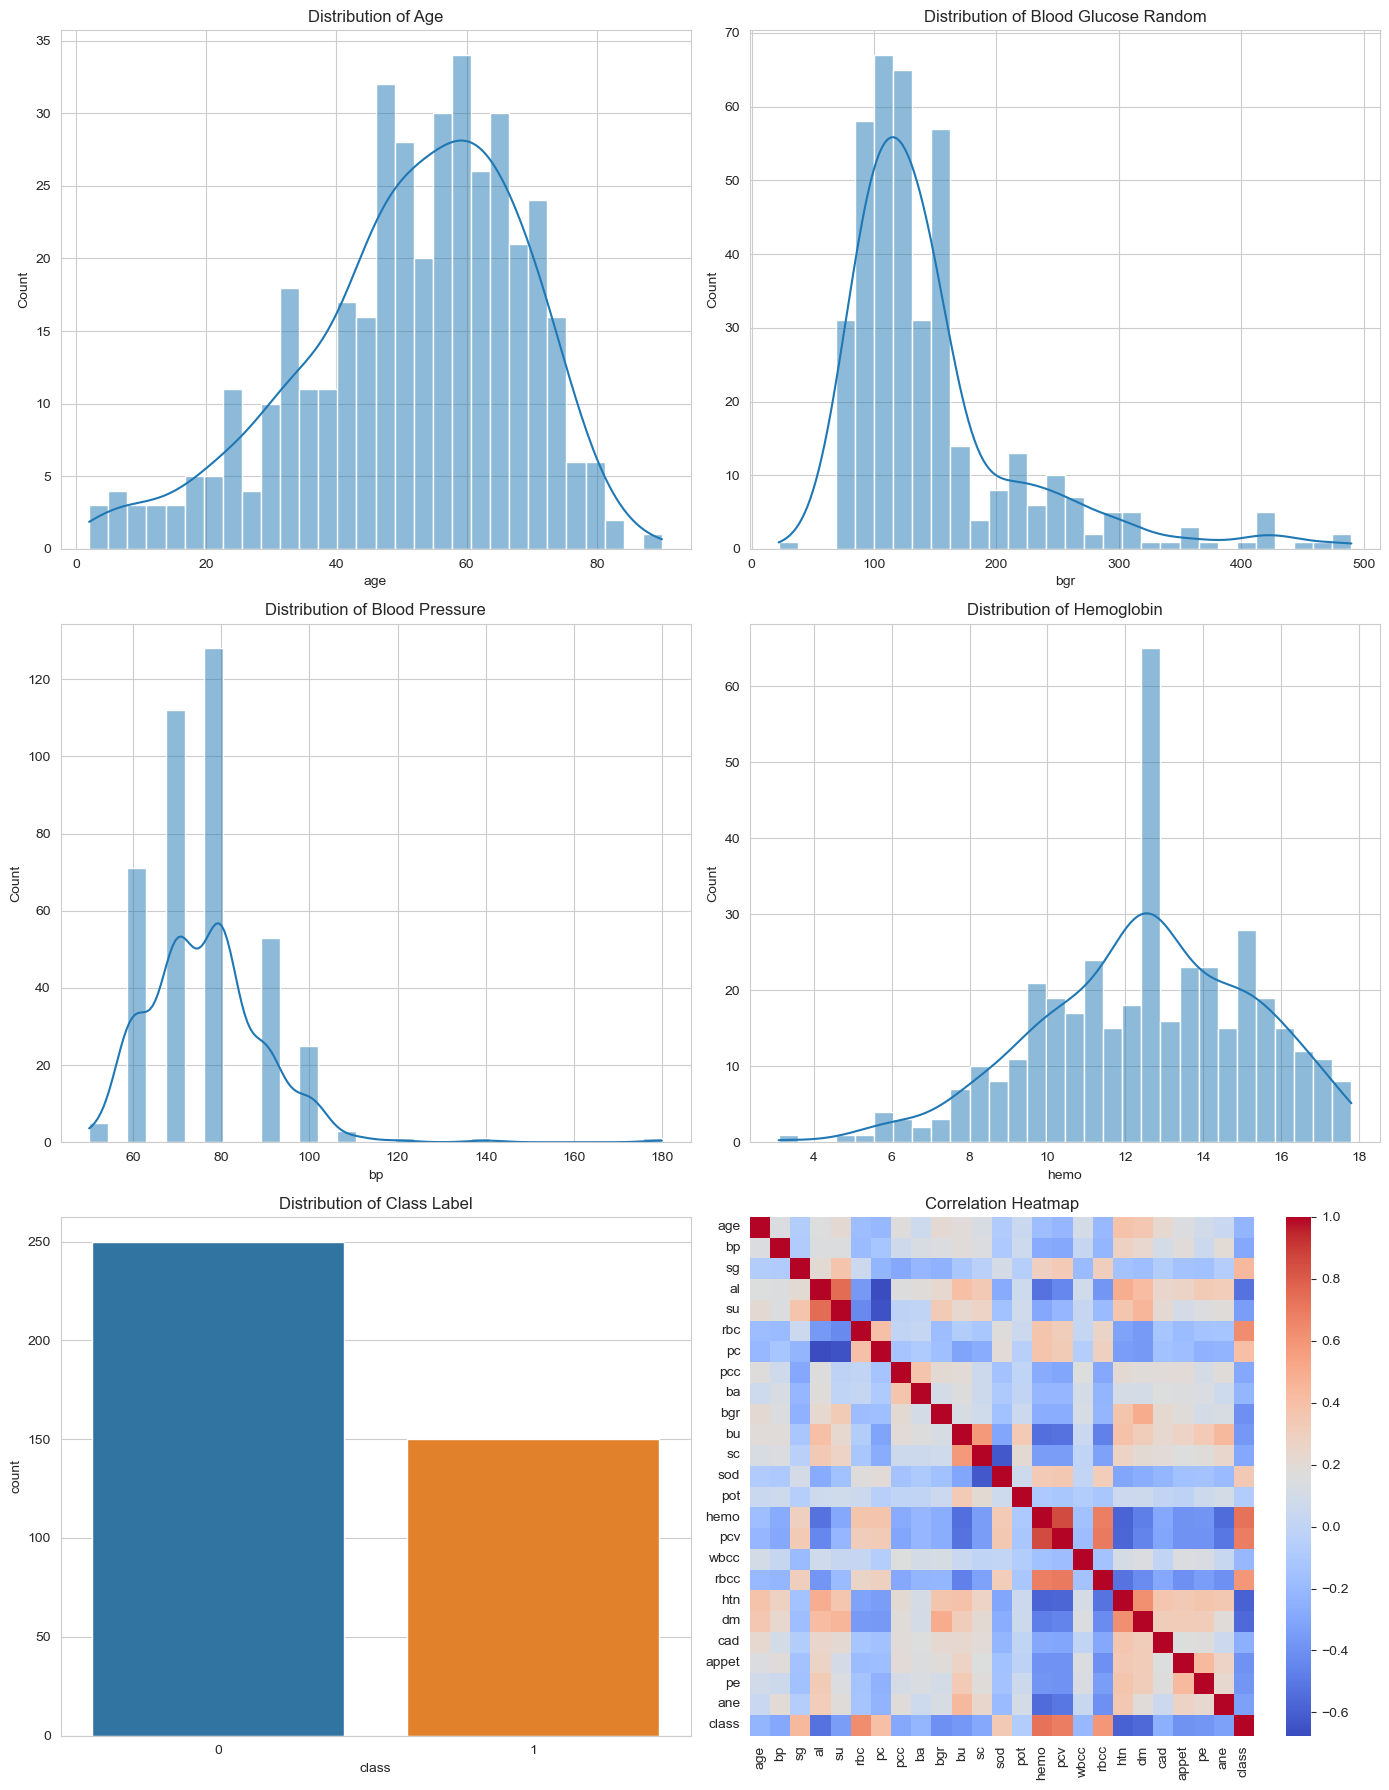

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a figure for multiple subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))

# Plotting distributions of numerical features
sns.histplot(df['age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Age')

sns.histplot(df['bgr'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of Blood Glucose Random')

sns.histplot(df['bp'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Blood Pressure')

sns.histplot(df['hemo'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Hemoglobin')

# Plotting the distribution of the class label
sns.countplot(x='class', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Distribution of Class Label')

# Plotting the correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', ax=axes[2, 1])
axes[2, 1].set_title('Correlation Heatmap')

# Adjusting layout
plt.tight_layout()
plt.show()

## K-means clustering

c:\Users\AUC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AUC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\AUC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AUC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

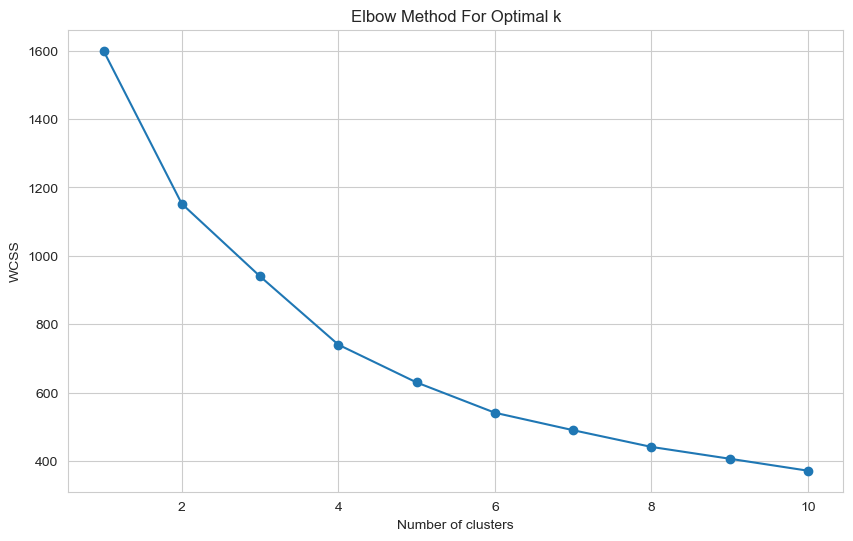

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Selecting a subset of features for clustering
features = df[['hemo', 'bgr', 'bp', 'sc']]
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Calculating the Within-Cluster Sum of Square (WCSS) for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

c:\Users\AUC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AUC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\AUC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\AUC\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment varia

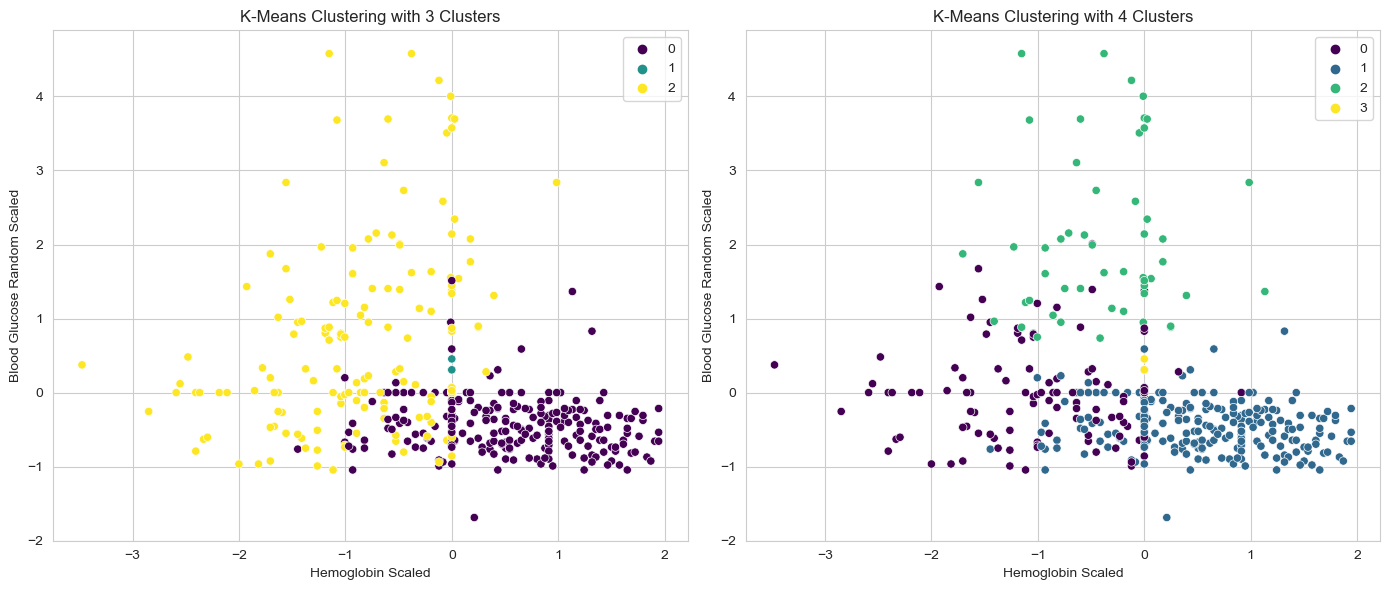

In [6]:
# Perform K-means clustering with the optimal numbers of clusters identified: 3 and 4
kmeans_3 = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)

# Fit the models
clusters_3 = kmeans_3.fit_predict(features_scaled)
clusters_4 = kmeans_4.fit_predict(features_scaled)

# Plotting the clusters
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Clusters when k=3
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=clusters_3, palette='viridis', ax=ax[0])
ax[0].set_title('K-Means Clustering with 3 Clusters')
ax[0].set_xlabel('Hemoglobin Scaled')
ax[0].set_ylabel('Blood Glucose Random Scaled')

# Clusters when k=4
sns.scatterplot(x=features_scaled[:, 0], y=features_scaled[:, 1], hue=clusters_4, palette='viridis', ax=ax[1])
ax[1].set_title('K-Means Clustering with 4 Clusters')
ax[1].set_xlabel('Hemoglobin Scaled')
ax[1].set_ylabel('Blood Glucose Random Scaled')

plt.tight_layout()
plt.show()

## Training the Model

In [7]:
# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Evaluating the Model

In [8]:
# Predict on the testing data
y_pred = rf_classifier.predict(X_test)

# Calculate the accuracy and generate a classification report
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Output the accuracy and the classification report
print(f"Accuracy: {accuracy}")
print("Classification Report:")
print(classification_rep)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        52
           1       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



## Save the model

In [8]:
# Save the model
import joblib
joblib.dump(rf_classifier, 'rf_classifier.joblib')

['rf_classifier.joblib']